In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import braingeneers
from braingeneers.analysis.analysis import SpikeData, read_phy_files
import braingeneers.data.datasets_electrophysiology as ephys
import scipy.io as sio
import scipy
from scipy.ndimage import gaussian_filter1d
import glob
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import random

In [2]:
sd = read_phy_files('/home/jovyan/work/Experiment/data/ephys/2023-04-02-hc328_rec/derived/kilosort2/2023_04_02_hc328_5_curated.zip')

In [3]:
# corr = np.zeros((sd.N,sd.N)) #inds by inds
# dense_raster = sd.raster(bin_size=1) # in ms
# sigma = 5                            # Blur it
# dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 
# corr=np.corrcoef( dense_raster )

In [4]:
# np.fill_diagonal(corr, 0)
# max_indices = np.unravel_index(np.argmax(corr), corr.shape)

In [5]:
# max_indices

In [3]:
max_indices = 41, 18

In [4]:
def plot_raster(sd, indexA, indexB):
    idces, times = sd.idces_times()

    # Filter data for units at indexA and indexB
    filter_idx = [indexA, indexB]
    filtered_idces = []
    filtered_times = []
    for idx, time in zip(idces, times):
        if idx in filter_idx:
            filtered_idces.append(idx)
            filtered_times.append(time)

    fig, ax = plt.subplots()

    # Set the vertical line length
    line_length = 0.5  # Adjust the length as needed

    # Plot vertical lines for each spike
    for i in range(len(filtered_times)):
        x = filtered_times[i] / 1000  # Convert time to seconds
        y = filtered_idces[i]
        ax.plot([x, x], [y - line_length, y + line_length], color='black')

    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    plt.show()

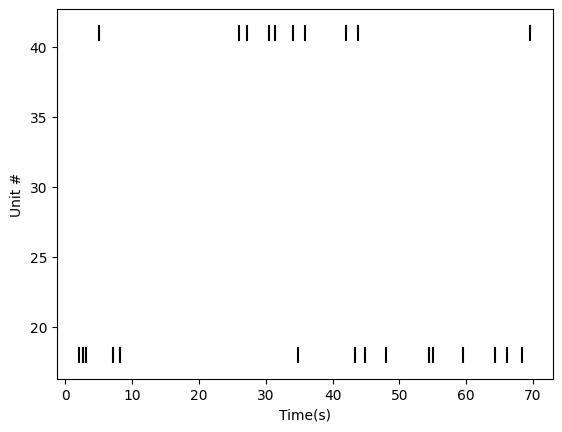

In [5]:
plot_raster(sd, 41, 18)

In [4]:
idces, times = sd.idces_times()

# Filter data for units at indexA and indexB
filter_idx = [41, 18]
filtered_idces = []
filtered_times = []
for idx, time in zip(idces, times):
    if idx in filter_idx:
        filtered_idces.append(idx)
        filtered_times.append(time)

In [5]:
combined_array = list(zip(filtered_idces, filtered_times))

print(combined_array)

[(18, 2073.7999999999997), (18, 2640.45), (18, 3104.1), (41, 5025.9), (18, 7185.150000000001), (18, 8171.200000000001), (41, 25986.25), (41, 27212.95), (41, 30419.05), (41, 31415.3), (41, 34031.4), (18, 34885.25), (41, 35885.45), (41, 41940.2), (18, 43337.45), (41, 43820.549999999996), (18, 44834.049999999996), (18, 47965.649999999994), (18, 54389.75), (18, 55008.55), (18, 59493.049999999996), (18, 64279.25000000001), (18, 66035.55), (18, 68308.04999999999), (41, 69583.25)]


In [6]:
arrA = []
arrB = []

for first, second in combined_array:
    if first == 41:
        arrA.append(second)
    elif first == 18:
        arrB.append(second)

In [7]:
correlated_neurons = [arrA, arrB]

In [11]:
correlated_neurons

[[5025.9,
  25986.25,
  27212.95,
  30419.05,
  31415.3,
  34031.4,
  35885.45,
  41940.2,
  43820.549999999996,
  69583.25],
 [2073.7999999999997,
  2640.45,
  3104.1,
  7185.150000000001,
  8171.200000000001,
  34885.25,
  43337.45,
  44834.049999999996,
  47965.649999999994,
  54389.75,
  55008.55,
  59493.049999999996,
  64279.25000000001,
  66035.55,
  68308.04999999999]]

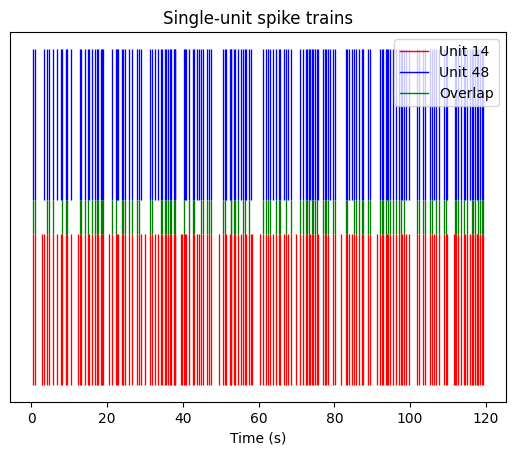

In [21]:
import matplotlib.ticker as ticker
line_length = 0.5  # Adjust the length as needed

fig, ax = plt.subplots()

# Plot spike train for neuron A
for time in arrA:
    ax.vlines(time, 0, 0.9 * line_length, color='red', linewidth=0.95)

# Plot spike train for neuron B
for time in arrB:
    ax.vlines(time, 1.1 * line_length, 2 * line_length, color='blue',linewidth=0.95)
    
overlap_times = set(arrA) & set(arrB)

# Plot overlapping vertical lines
for time in overlap_times:
    ax.vlines(time, 0.9 * line_length, 1.1 * line_length, color='green', linewidth=0.95)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Neuron")

ax.axes.get_yaxis().set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x / 1000:.0f}"))

legend_elements = [
    plt.Line2D([], [], color='red', linewidth=1, label='Unit 14'),
    plt.Line2D([], [], color='blue', linewidth=1, label='Unit 48'),
    plt.Line2D([], [], color='green', linewidth=1, label='Overlap')
]
ax.legend(handles=legend_elements)
ax.set_title("Single-unit spike trains")

plt.show()

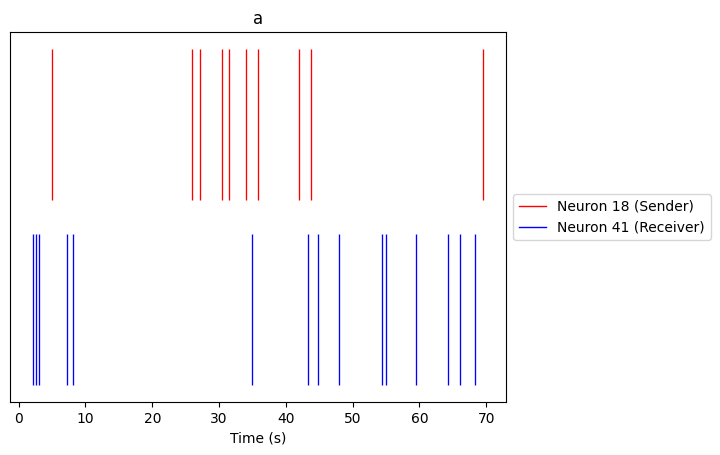

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

line_length = 0.5  # Adjust the length as needed

fig, ax = plt.subplots()

# Plot spike train for neuron A
for time in arrB:
    ax.vlines(time, 0, 0.9 * line_length, color='blue', linewidth=0.95)

# Plot spike train for neuron B
for time in arrA:
    ax.vlines(time, 1.1 * line_length, 2 * line_length, color='red', linewidth=0.95)

# # Find overlapping time values between arrA and arrB
# overlap_times = set(arrA) & set(arrB)

# # Plot overlapping vertical lines
# for time in overlap_times:
#     ax.vlines(time, 0.9 * line_length, 1.1 * line_length, color='green', linewidth=0.95)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Neuron")

ax.axes.get_yaxis().set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x / 1000:.0f}"))

unit18_legend = plt.Line2D([], [], color='red', linewidth=1, label='Neuron 18 (Sender)')
unit41_legend = plt.Line2D([], [], color='blue', linewidth=1, label='Neuron 41 (Receiver)')

# Create separate legends
ax.legend(handles=[unit18_legend], loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(handles=[unit41_legend], loc='center left', bbox_to_anchor=(1, 0.5))


# Combine all legends into one
ax.legend(handles=[unit18_legend, unit41_legend], loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title("a")
plt.savefig('/home/jovyan/work/Experiment/Thomas/Plot_A.png')

plt.show()

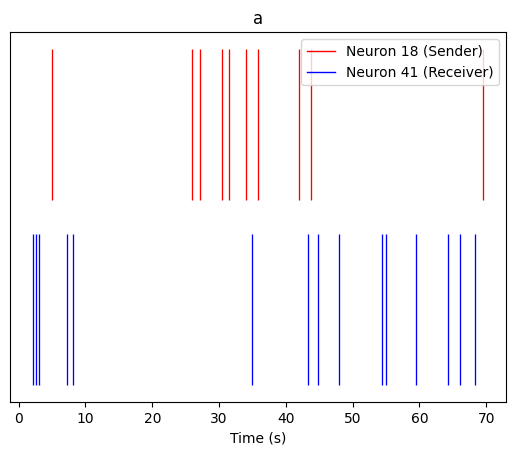

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

line_length = 0.5  # Adjust the length as needed

fig, ax = plt.subplots()

# Plot spike train for neuron A
for time in arrB:
    ax.vlines(time, 0, 0.9 * line_length, color='blue', linewidth=0.95)

# Plot spike train for neuron B
for time in arrA:
    ax.vlines(time, 1.1 * line_length, 2 * line_length, color='red', linewidth=0.95)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Neuron")

ax.axes.get_yaxis().set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x / 1000:.0f}"))

unit18_legend = plt.Line2D([], [], color='red', linewidth=1, label='Neuron 18 (Sender)')
unit41_legend = plt.Line2D([], [], color='blue', linewidth=1, label='Neuron 41 (Receiver)')

# Combine all legends into one and place inside the plot
ax.legend(handles=[unit18_legend, unit41_legend], loc='best')

ax.set_title("a")
plt.savefig('/home/jovyan/work/Experiment/Thomas/Plot_A.png')
plt.show()


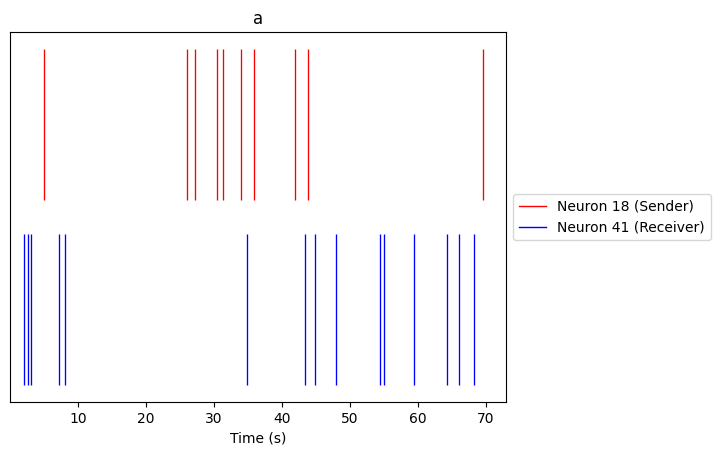

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

line_length = 0.5  # Adjust the length as needed

fig, ax = plt.subplots()

# Plot spike train for neuron A
for time in arrB:
    ax.vlines(time, 0, 0.9 * line_length, color='blue', linewidth=0.95)

# Plot spike train for neuron B
for time in arrA:
    ax.vlines(time, 1.1 * line_length, 2 * line_length, color='red', linewidth=0.95)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Neuron")

# Set x-axis limits
ax.set_xlim(20, None)  # Adjust the starting limit as needed

ax.axes.get_yaxis().set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x / 1000:.0f}"))

unit18_legend = plt.Line2D([], [], color='red', linewidth=1, label='Neuron 18 (Sender)')
unit41_legend = plt.Line2D([], [], color='blue', linewidth=1, label='Neuron 41 (Receiver)')

# Combine all legends into one
ax.legend(handles=[unit18_legend, unit41_legend], loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title("a")

plt.show()

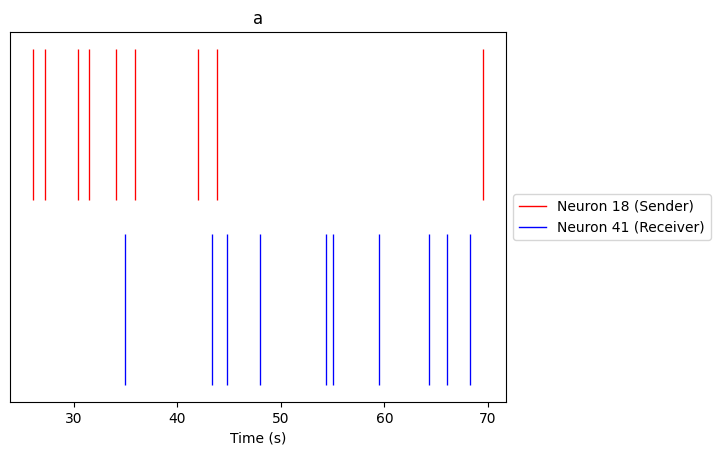

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

line_length = 0.5  # Adjust the length as needed

fig, ax = plt.subplots()

# Filter spike train arrays to exclude values below 20s
arrA_filtered = [time for time in arrA if time >= 20000]
arrB_filtered = [time for time in arrB if time >= 20000]

# Plot spike train for neuron A
for time in arrB_filtered:
    ax.vlines(time, 0, 0.9 * line_length, color='blue', linewidth=0.95)

# Plot spike train for neuron B
for time in arrA_filtered:
    ax.vlines(time, 1.1 * line_length, 2 * line_length, color='red', linewidth=0.95)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Neuron")

ax.axes.get_yaxis().set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x / 1000:.0f}"))

unit18_legend = plt.Line2D([], [], color='red', linewidth=1, label='Neuron 18 (Sender)')
unit41_legend = plt.Line2D([], [], color='blue', linewidth=1, label='Neuron 41 (Receiver)')

# Combine all legends into one
ax.legend(handles=[unit18_legend, unit41_legend], loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title("a")
plt.savefig('/home/jovyan/work/Experiment/Thomas/Plot_A.png')

plt.show()

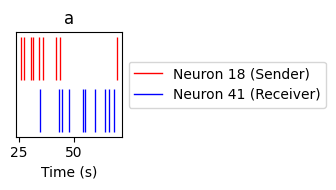

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

line_length = 0.5  # Adjust the length as needed

fig, ax = plt.subplots(figsize=(4, 2))  # Adjust the figure size as needed

# Filter spike train arrays to exclude values below 20s
arrA_filtered = [time for time in arrA if time >= 20000]
arrB_filtered = [time for time in arrB if time >= 20000]

# Plot spike train for neuron A
for time in arrB_filtered:
    ax.vlines(time, 0, 0.9 * line_length, color='blue', linewidth=0.95)

# Plot spike train for neuron B
for time in arrA_filtered:
    ax.vlines(time, 1.1 * line_length, 2 * line_length, color='red', linewidth=0.95)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Neuron")

ax.axes.get_yaxis().set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x / 1000:.0f}"))

unit18_legend = plt.Line2D([], [], color='red', linewidth=1, label='Neuron 18 (Sender)')
unit41_legend = plt.Line2D([], [], color='blue', linewidth=1, label='Neuron 41 (Receiver)')

# Combine all legends into one
ax.legend(handles=[unit18_legend, unit41_legend], loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title("a")

# Adjust the position of the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Increase the right margin (0.85) as needed

plt.savefig("Plot_A2.png", dpi=300, bbox_inches='tight')  # Save the figure with higher dpi and tight bounding box
plt.show()

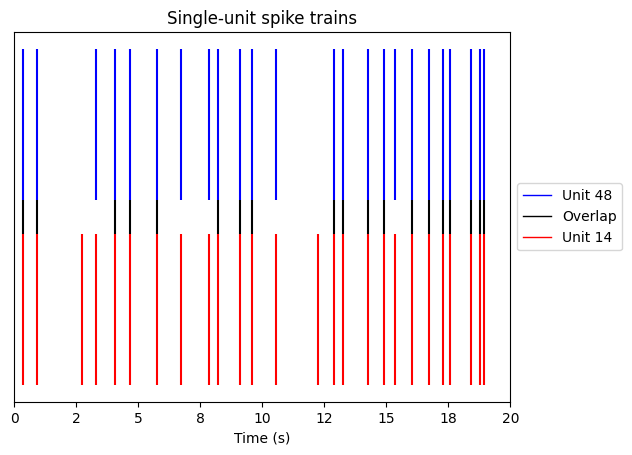

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

line_length = 0.5  # Adjust the length as needed

fig, ax = plt.subplots()

# Plot spike train for neuron A
for time in arrA:
    ax.vlines(time, 0, 0.9 * line_length, color='red')

# Plot spike train for neuron B
for time in arrB:
    ax.vlines(time, 1.1 * line_length, 2 * line_length, color='blue')

# Find overlapping time values between arrA and arrB
overlap_times = set(arrA) & set(arrB)

# Plot overlapping vertical lines
for time in overlap_times:
    ax.vlines(time, 0.9 * line_length, 1.1 * line_length, color='black')

ax.set_xlabel("Time (s)")
ax.set_ylabel("Neuron")

ax.axes.get_yaxis().set_visible(False)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x / 1000:.0f}"))

unit14_legend = plt.Line2D([], [], color='red', linewidth=1, label='Unit 14')
unit48_legend = plt.Line2D([], [], color='blue', linewidth=1, label='Unit 48')
overlap_legend = plt.Line2D([], [], color='black', linewidth=1, label='Overlap')

# Combine all legends into one
ax.legend(handles=[unit48_legend, overlap_legend, unit14_legend], loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlim(0, 20000)  # Set x-axis limits to the first 20 seconds (20,000 milliseconds)

ax.set_title("Single-unit spike trains")

plt.show()

Index: 7 Element: s
Index: 15 Element: s
Index: 18 Element: r
Index: 19 Element: s
Index: 20 Element: s
Index: 21 Element: r
Index: 27 Element: r
Index: 38 Element: r
Index: 42 Element: s
Index: 45 Element: s
Index: 56 Element: s
Index: 57 Element: r
Index: 59 Element: r
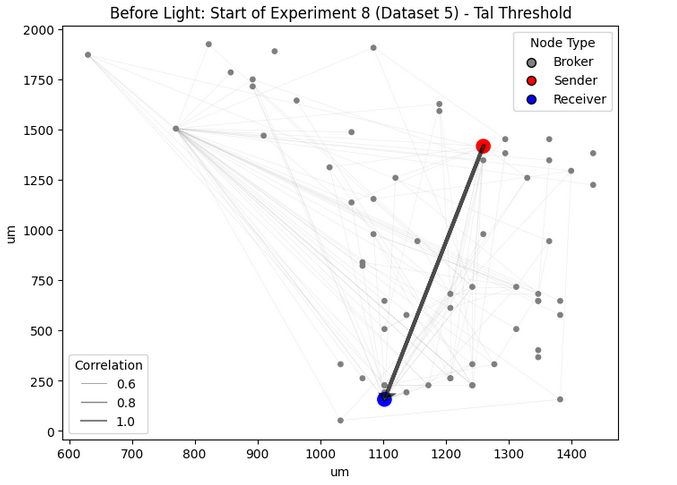